# Exploración de Datos

En este documento, realizaremos una exploración inicial de los datos. Los objetivos principales son:

1. **Carga de Datos**: Importar los datos desde las fuentes disponibles.
2. **Inspección de Datos**: Revisar la estructura de los datos, incluyendo el número de filas y columnas, tipos de datos, y valores faltantes.
3. **Estadísticas Descriptivas**: Calcular estadísticas básicas como media, mediana, desviación estándar, etc.
4. **Visualización de Datos**: Crear gráficos y visualizaciones para entender mejor las distribuciones y relaciones en los datos.
5. **Detección de Anomalías**: Identificar valores atípicos o inconsistencias en los datos.

Este análisis inicial nos ayudará a comprender mejor los datos y a preparar el terreno para etapas posteriores del proyecto, como la limpieza de datos y el modelado predictivo.


In [3]:
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()


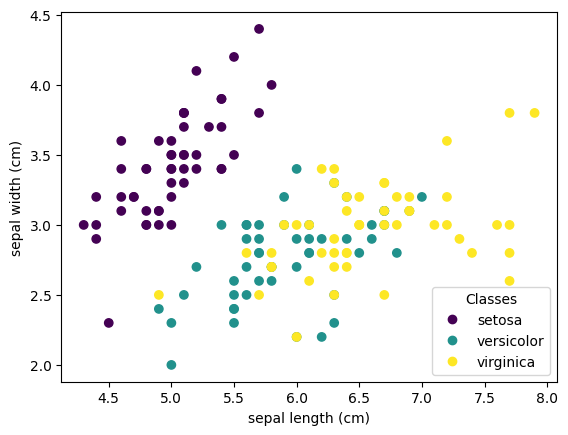

In [6]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

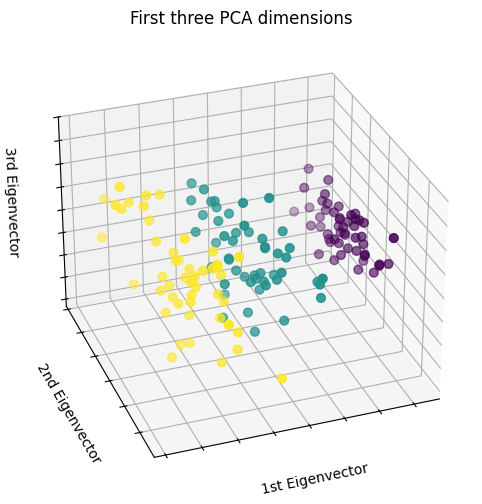

In [7]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [8]:
import pandas as pd


# Convert the dataset to a pandas DataFrame
iris_df = pd.DataFrame(
    data=iris.data,  # Features data
    columns=iris.feature_names  # Feature names as column headers
)

# Add the target (class labels) to the DataFrame
iris_df['target'] = iris.target

# Display the first few rows of the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris_df.describe() # Summary statistics

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Análisis Estadístico del Conjunto de Datos de Iris


#### Observaciones:

- **sepal length (cm)**: La longitud del sépalo varía entre 4.3 cm y 7.9 cm, con una media de 5.84 cm y una desviación estándar de 0.83 cm.
- **sepal width (cm)**: El ancho del sépalo varía entre 2.0 cm y 4.4 cm, con una media de 3.06 cm y una desviación estándar de 0.44 cm.
- **petal length (cm)**: La longitud del pétalo varía entre 1.0 cm y 6.9 cm, con una media de 3.76 cm y una desviación estándar de 1.77 cm.
- **petal width (cm)**: El ancho del pétalo varía entre 0.1 cm y 2.5 cm, con una media de 1.20 cm y una desviación estándar de 0.76 cm.
- **target**: La variable objetivo tiene tres clases (0, 1, 2) con una media de 1.0 y una desviación estándar de 0.82.

Estas estadísticas proporcionan una visión general de la distribución de las características en el conjunto de datos de iris. Podemos observar que las características de los pétalos tienen una mayor variabilidad en comparación con las características de los sépalos.

In [14]:
iris_df.info() # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


En total hay 150 entradas de tipo float y una de tipo entero, sin valores nulos en las filas

In [19]:
iris_df['target'].value_counts() # Class distribution

target
0    50
1    50
2    50
Name: count, dtype: int64

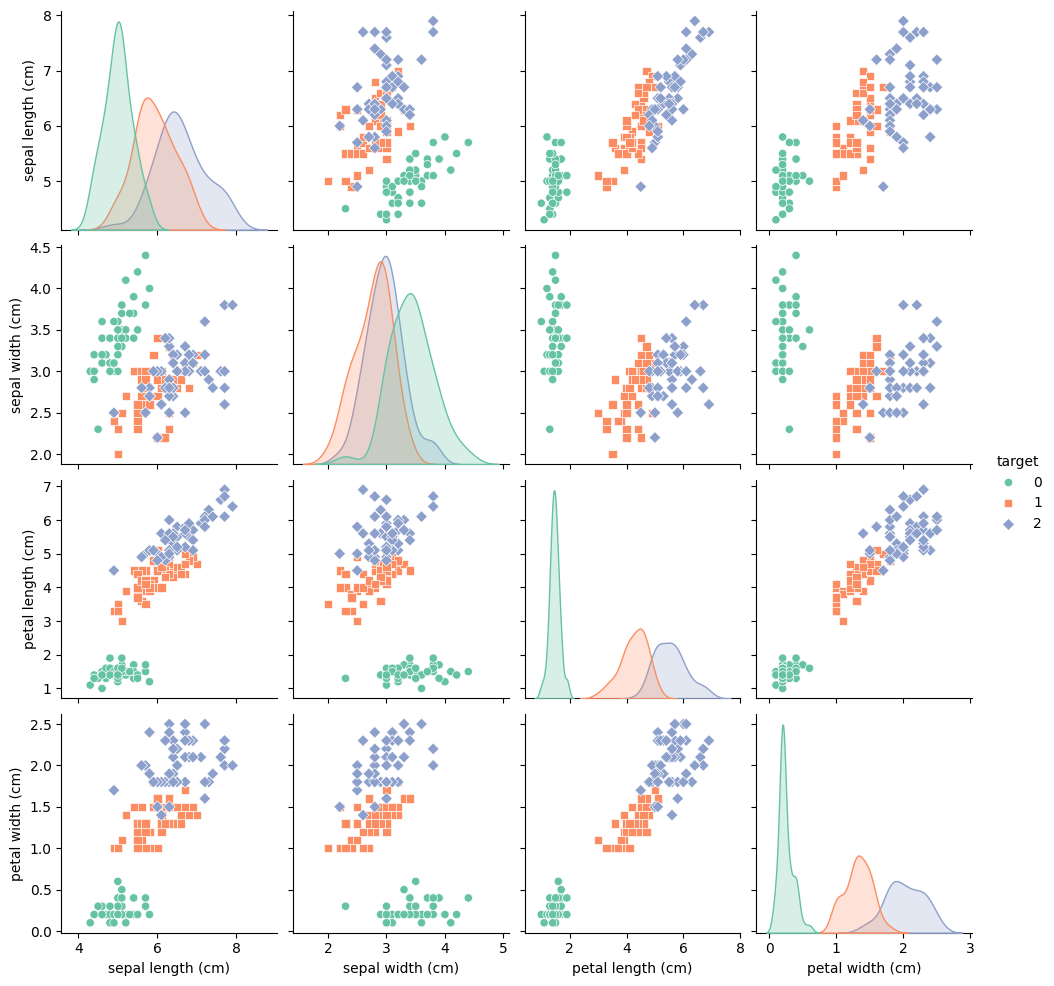

In [10]:
import seaborn as sns

# Create a pair plot
sns.pairplot(iris_df, hue='target', markers=["o", "s", "D"], palette="Set2")
plt.show()


**Conclusiones del Pair Plot**:
- El pair plot muestra la relación entre cada par de características del conjunto de datos de iris.
- Podemos observar que la clase setosa está claramente separada de las otras dos clases en la mayoría de las combinaciones de características.
- Las clases versicolor y virginica se solapan en varias combinaciones de características, lo que puede dificultar su separación.
- Las características de los pétalos (longitud y ancho) parecen ser más discriminativas que las características de los sépalos para separar las clases.



1. **Descripción del Dataset**:
    - El dataset de iris contiene 150 muestras de flores de iris, con 4 características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.
    - Hay 3 clases de flores de iris: setosa, versicolor y virginica.

2. **Análisis de las Gráficas**:
    - **Gráfica de Dispersión 2D**:
      

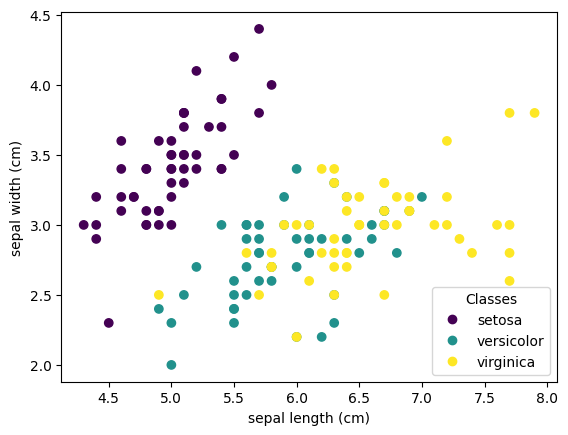

In [11]:

      _, ax = plt.subplots()
      scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
      ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
      _ = ax.legend(
            scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
      )
      plt.show()
     

Esta gráfica muestra la dispersión de las muestras en función de la longitud y el ancho del sépalo. Podemos observar que las muestras de la clase setosa están claramente separadas de las otras dos clases, mientras que las clases versicolor y virginica se solapan en cierta medida.

**Gráfica 3D de PCA**:
     

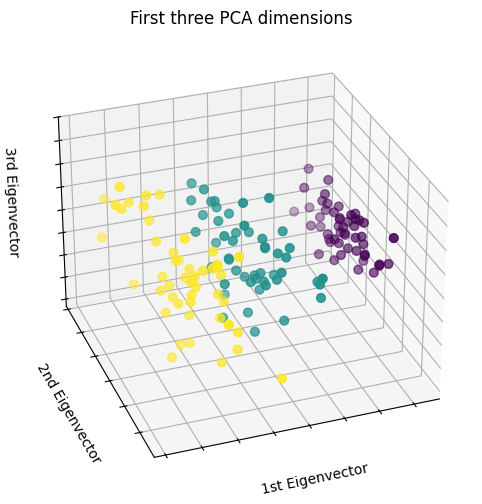

In [12]:

      fig = plt.figure(1, figsize=(8, 6))
      ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
      X_reduced = PCA(n_components=3).fit_transform(iris.data)
      ax.scatter(
            X_reduced[:, 0],
            X_reduced[:, 1],
            X_reduced[:, 2],
            c=iris.target,
            s=40,
      )
      ax.set_title("First three PCA dimensions")
      ax.set_xlabel("1st Eigenvector")
      ax.xaxis.set_ticklabels([])
      ax.set_ylabel("2nd Eigenvector")
      ax.yaxis.set_ticklabels([])
      ax.set_zlabel("3rd Eigenvector")
      ax.zaxis.set_ticklabels([])
      plt.show()
     

Esta gráfica muestra la proyección de las muestras en las tres primeras dimensiones principales obtenidas mediante PCA. Podemos observar que las muestras de la clase setosa están claramente separadas, mientras que las clases versicolor y virginica se solapan en cierta medida, aunque hay una mejor separación en comparación con la gráfica 2D.

**Pair Plot**:

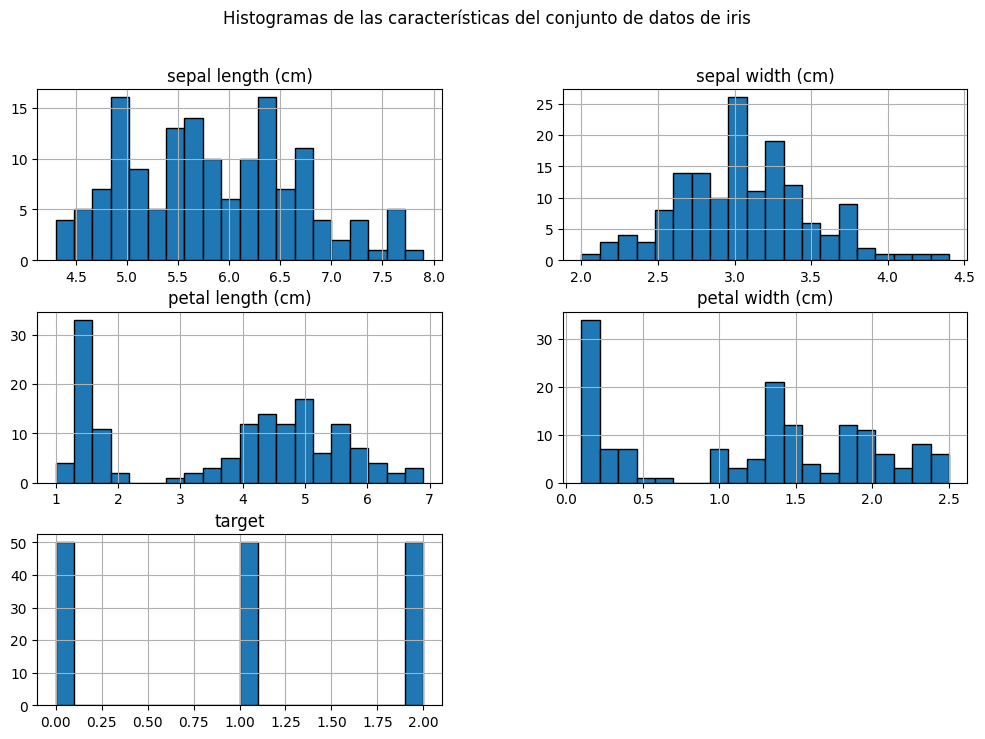

In [13]:

      iris_df.hist(bins=20, figsize=(12, 8), edgecolor='black')
      plt.suptitle('Histogramas de las características del conjunto de datos de iris')
      plt.show()
      


3. **Conclusiones**:
    - La clase setosa es la más fácil de separar de las otras dos clases, tanto en las gráficas de dispersión como en los histogramas.
    - Las clases versicolor y virginica se solapan en varias combinaciones de características, lo que puede dificultar su separación.
    - Las características de los pétalos (longitud y ancho) parecen ser más discriminativas que las características de los sépalos para separar las clases.
    - La reducción de dimensionalidad mediante PCA ayuda a visualizar mejor la separación entre las clases, aunque sigue habiendo solapamiento entre versicolor y virginica.

Este análisis proporciona una visión general del dataset de iris y las relaciones entre sus características, así como la efectividad de diferentes técnicas de visualización para separar las clases.

# Preprocessing the dataset

In [21]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## Correlation Matrix

In [28]:
iris_df.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


### Heatmap del Conjunto de Datos Iris
Un mapa de calor es una excelente manera de visualizar la correlación entre diferentes características en el conjunto de datos. A continuación, se muestra el mapa de calor del conjunto de datos Iris, que muestra la correlación entre la longitud del sépalo, el ancho del sépalo, la longitud del pétalo, el ancho del pétalo y la clase objetivo.

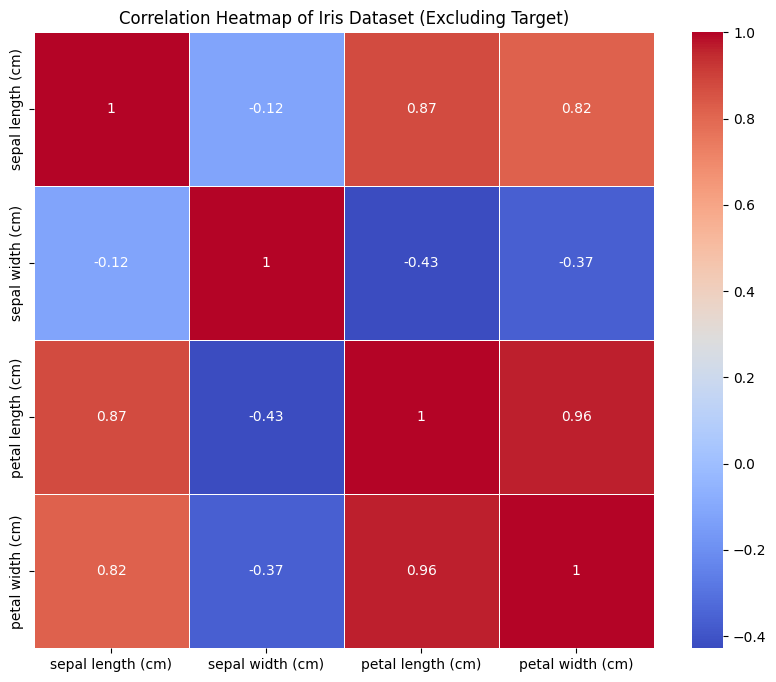

In [29]:

corr_matrix_no_target = iris_df.drop(columns=['target']).corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_no_target, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset (Excluding Target)')
plt.show()


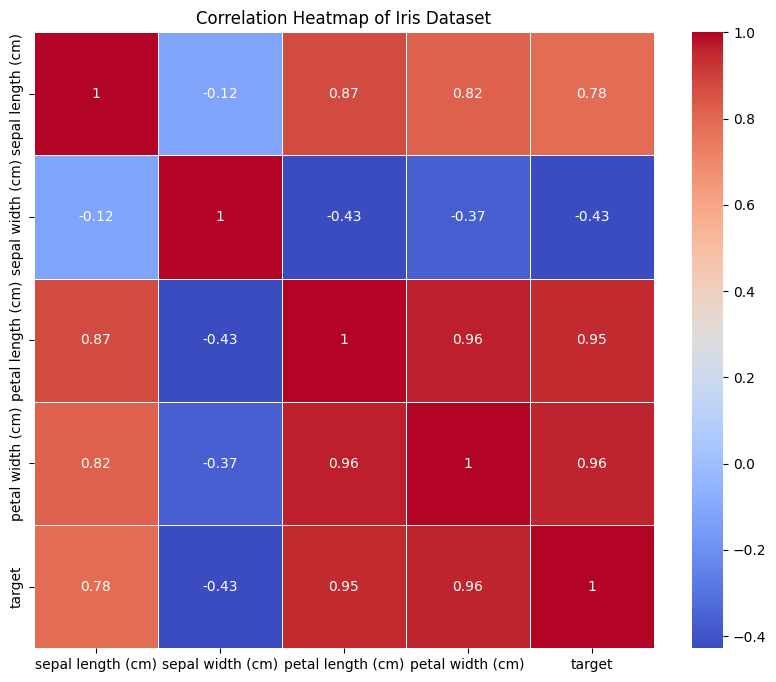

In [30]:

# Compute the correlation matrix
corr_matrix = iris_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()


### Codificador de Etiquetas

En el aprendizaje automático, generalmente trabajamos con conjuntos de datos que contienen múltiples etiquetas en una o más columnas. Estas etiquetas pueden estar en forma de palabras o números. La Codificación de Etiquetas se refiere a convertir las etiquetas en forma numérica para hacerlas legibles para la máquina.



In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
# Fit and transform the target labels
iris_df['target_encoded'] = le.fit_transform(iris_df['target'])

# Display the first few rows of the DataFrame to verify the encoding
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_encoded
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


## Model Training

### KNeighborsClassifier

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X = iris_df.drop(columns=['target', 'target_encoded'])
y = iris_df['target_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


### DecisionTreeClassifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_dtree = dtree.predict(X_test)

# Calculate the accuracy of the model
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f'Decision Tree Accuracy: {accuracy_dtree:.2f}')

Decision Tree Accuracy: 1.00


### LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_log_reg = log_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}')

Logistic Regression Accuracy: 1.00
